# Visualize the wieghts of PCA for each experiment, and how they change when the data is combined

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from toolz import partial
from pathlib import Path
from aging.plotting import format_plots, figure, legend, add_identity
import colorcet as cc
from sklearn.decomposition import PCA

In [52]:
dotted_identity = partial(add_identity, linestyle='--', color='k')

In [2]:
format_plots()

In [3]:
version = 8
folder = Path(f"/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}")

In [4]:
usages = pd.read_parquet(folder / "ontogeny_males_clean_v2.parquet").fillna(0).astype('float32')
long_usages = pd.read_parquet(folder / "longtogeny_males_clean_v1.parquet").fillna(0).astype('float32')

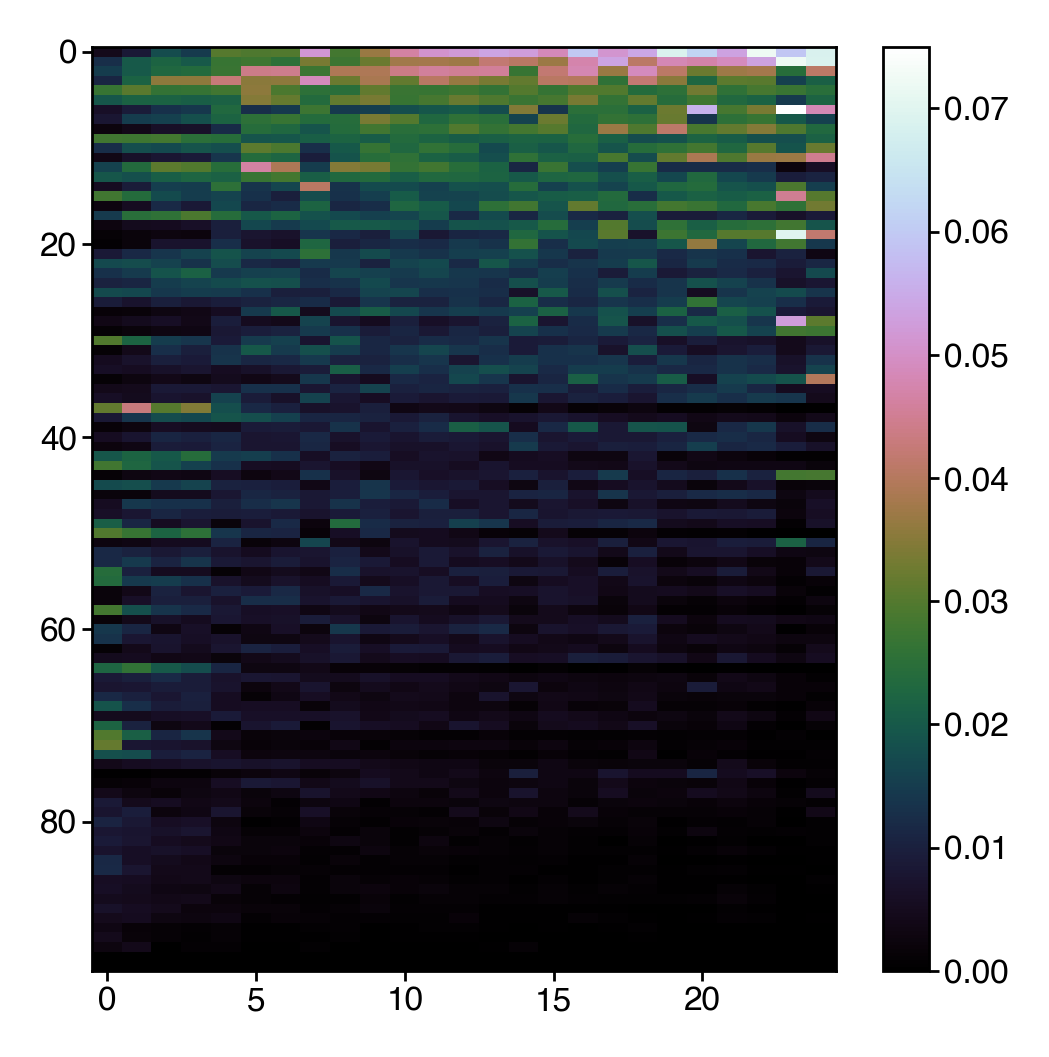

In [5]:
plt.imshow(
    usages.groupby("age").mean().T,
    aspect="auto",
    vmin=0,
    vmax=0.075,
    cmap="cubehelix",
    interpolation="none",
)
plt.colorbar()

In [21]:
def reindex_c(df1, df2):
    return df1.reindex(columns=df2.columns).fillna(0)

In [32]:
pca = PCA(n_components=2, whiten=True)
pca.fit(usages)
ont_components = pca.components_.copy()

Text(0, 0.5, 'PC weight')

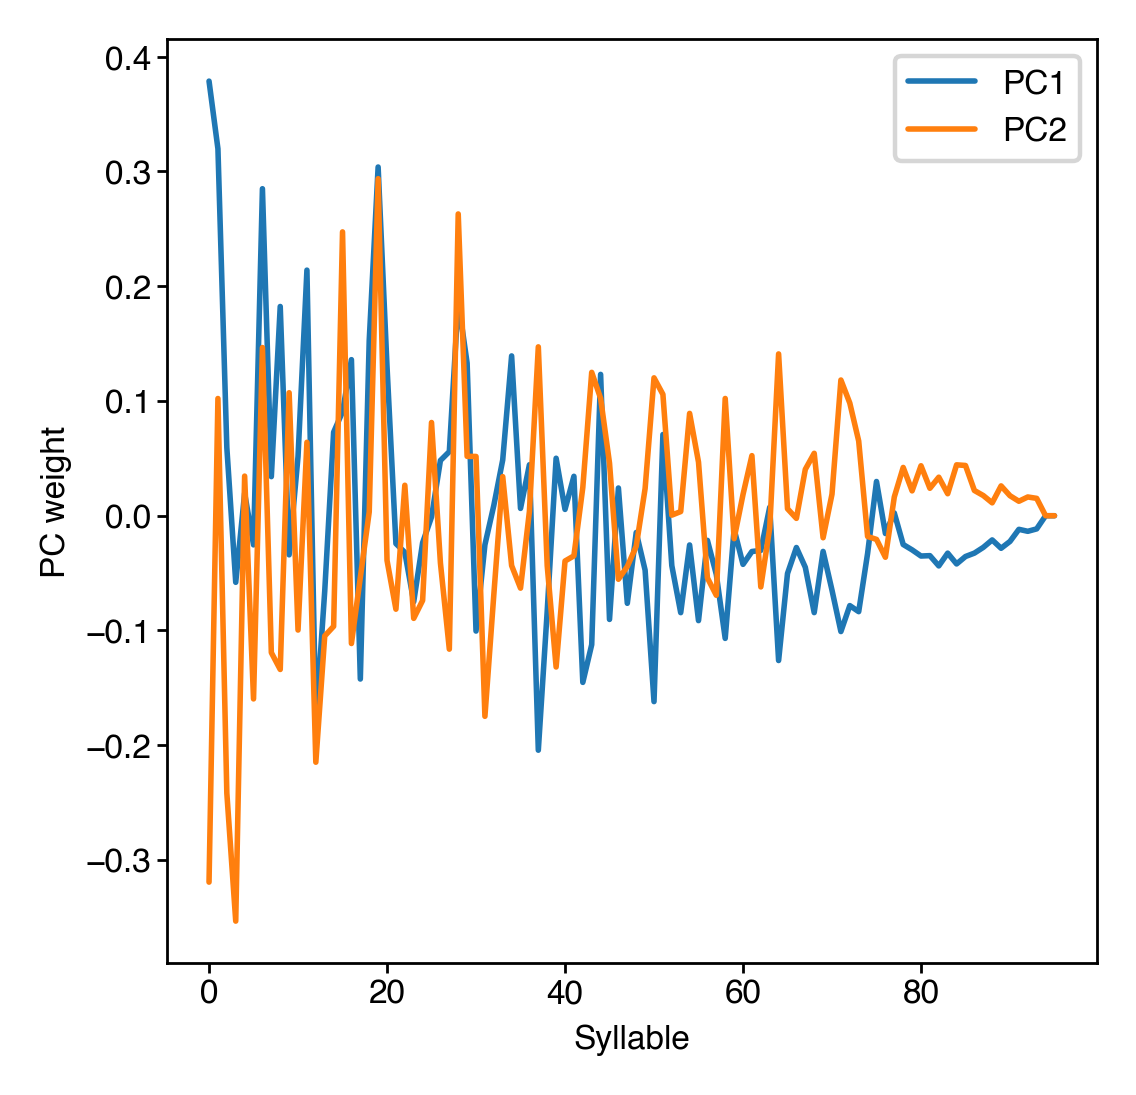

In [33]:
plt.plot(ont_components.T)
plt.legend(["PC1", "PC2"])
plt.xlabel("Syllable")
plt.ylabel("PC weight")

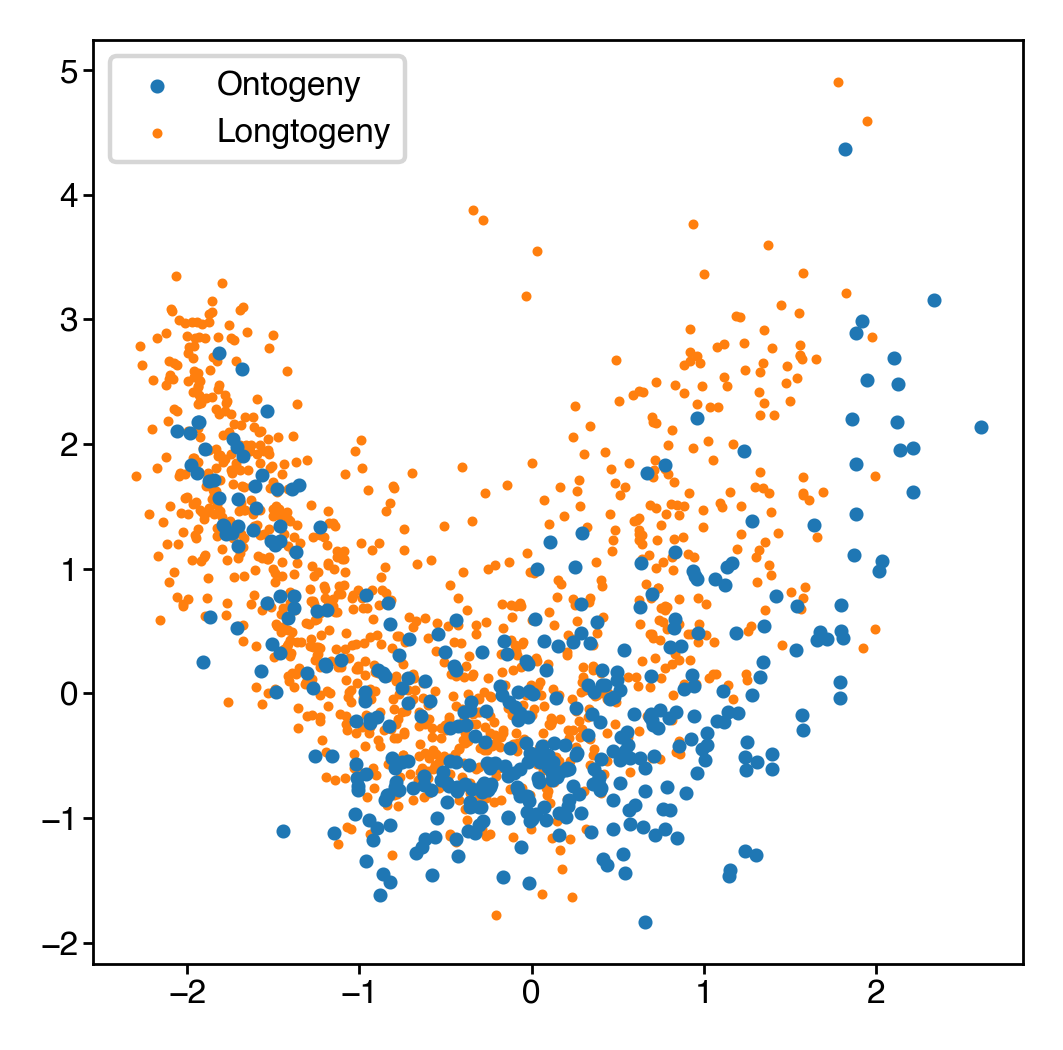

In [35]:
plt.scatter(*pca.transform(usages).T, s=3, label="Ontogeny")
plt.scatter(*pca.transform(reindex_c(long_usages, usages)).T, s=1, label="Longtogeny", zorder=-1)
plt.legend()

In [36]:
pca = PCA(n_components=2, whiten=True)
pca.fit(reindex_c(long_usages, usages))
long_components = pca.components_.copy()

Text(0, 0.5, 'PC weight')

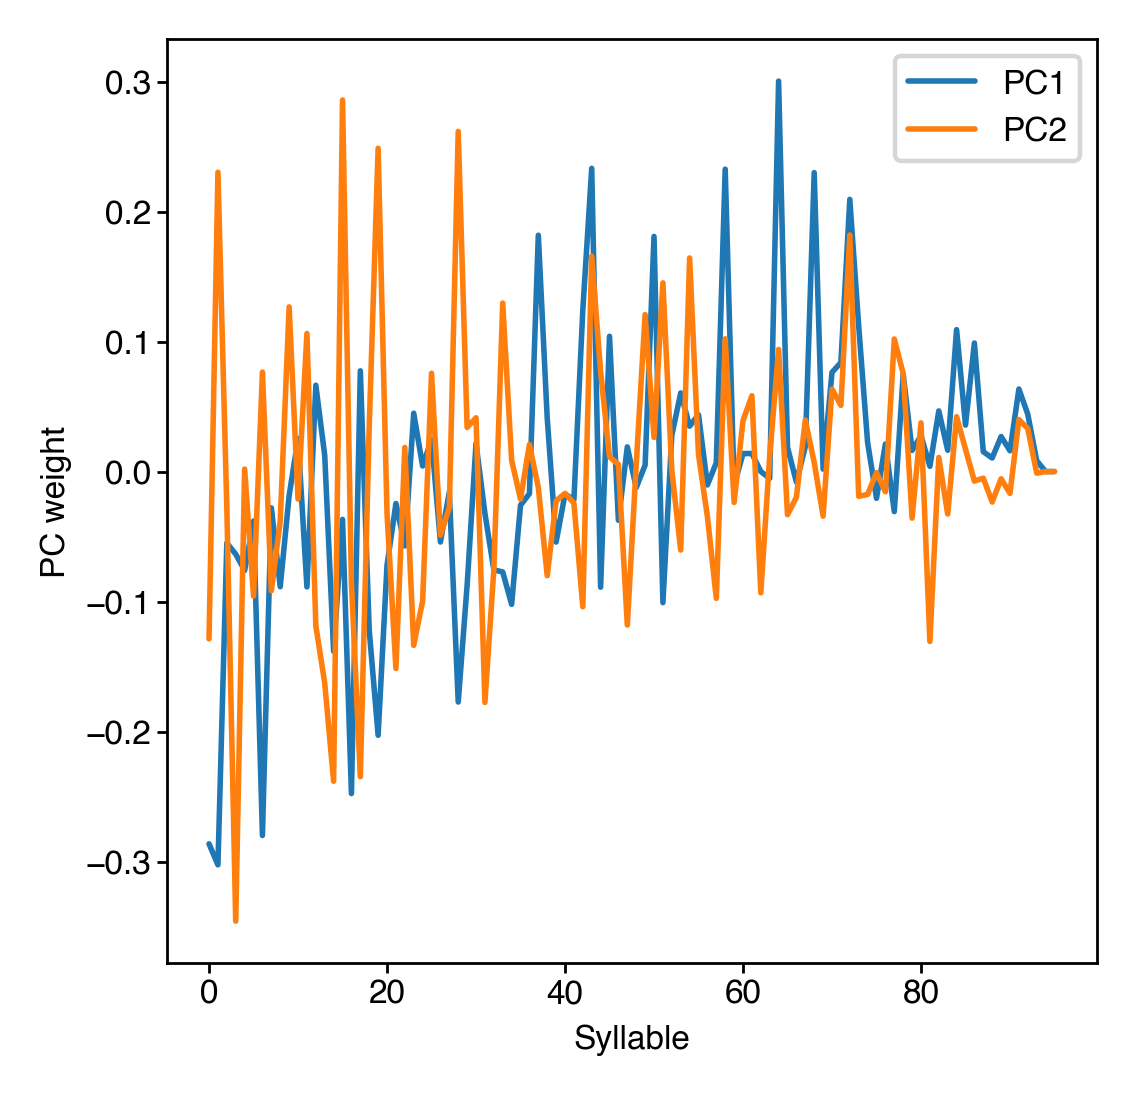

In [37]:
plt.plot(long_components.T)
plt.legend(["PC1", "PC2"])
plt.xlabel("Syllable")
plt.ylabel("PC weight")

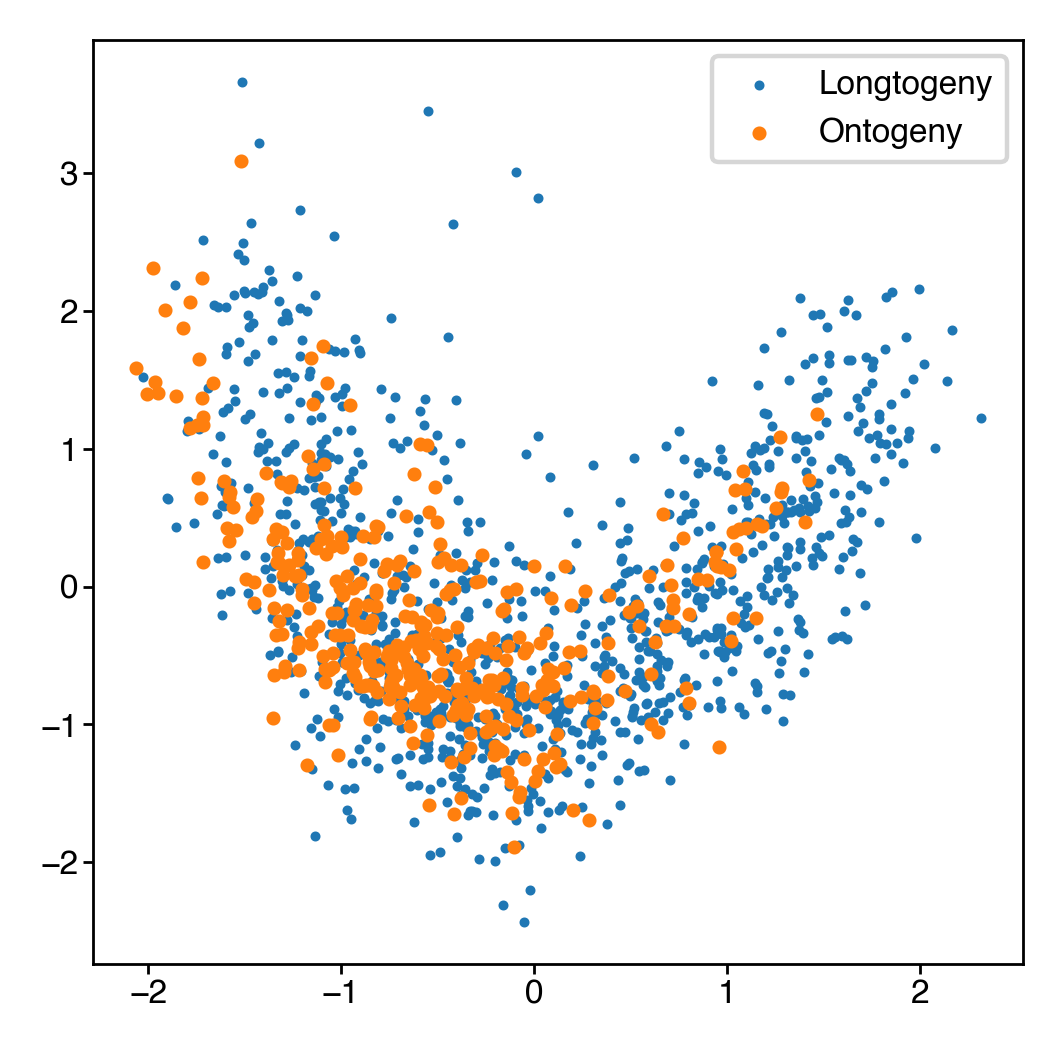

In [38]:
plt.scatter(*pca.transform(reindex_c(long_usages, usages)).T, s=1, label="Longtogeny")
plt.scatter(*pca.transform(usages).T, s=3, label="Ontogeny")
plt.legend()

In [39]:
# combined data components
pca.fit(pd.concat([usages, long_usages]).fillna(0))

combined_components = pca.components_.copy()

Text(0, 0.5, 'PC weight')

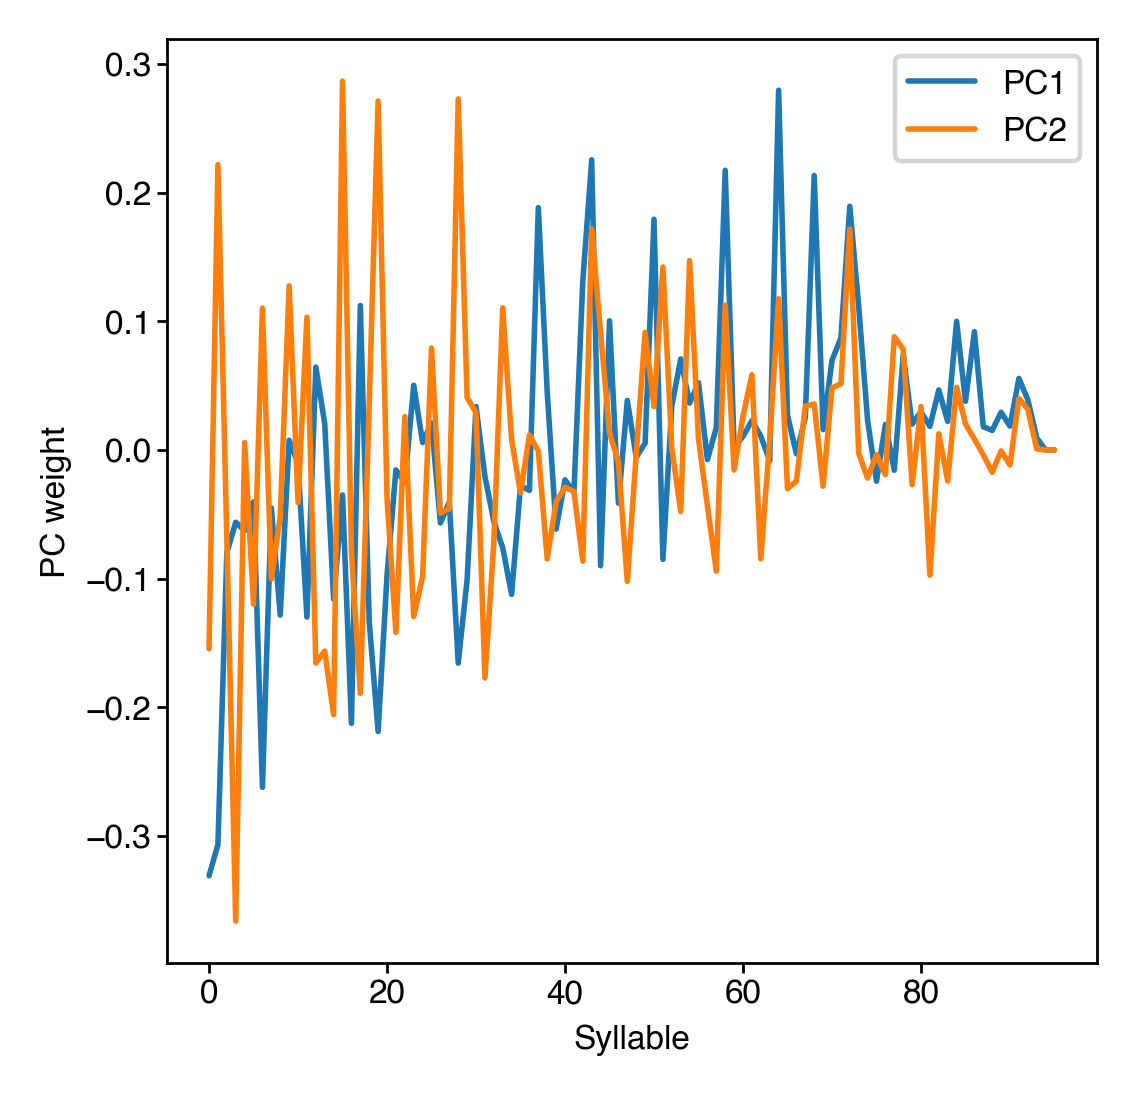

In [41]:
plt.plot(combined_components.T)
plt.legend(["PC1", "PC2"])
plt.xlabel("Syllable")
plt.ylabel("PC weight")

-0.8531883234971739

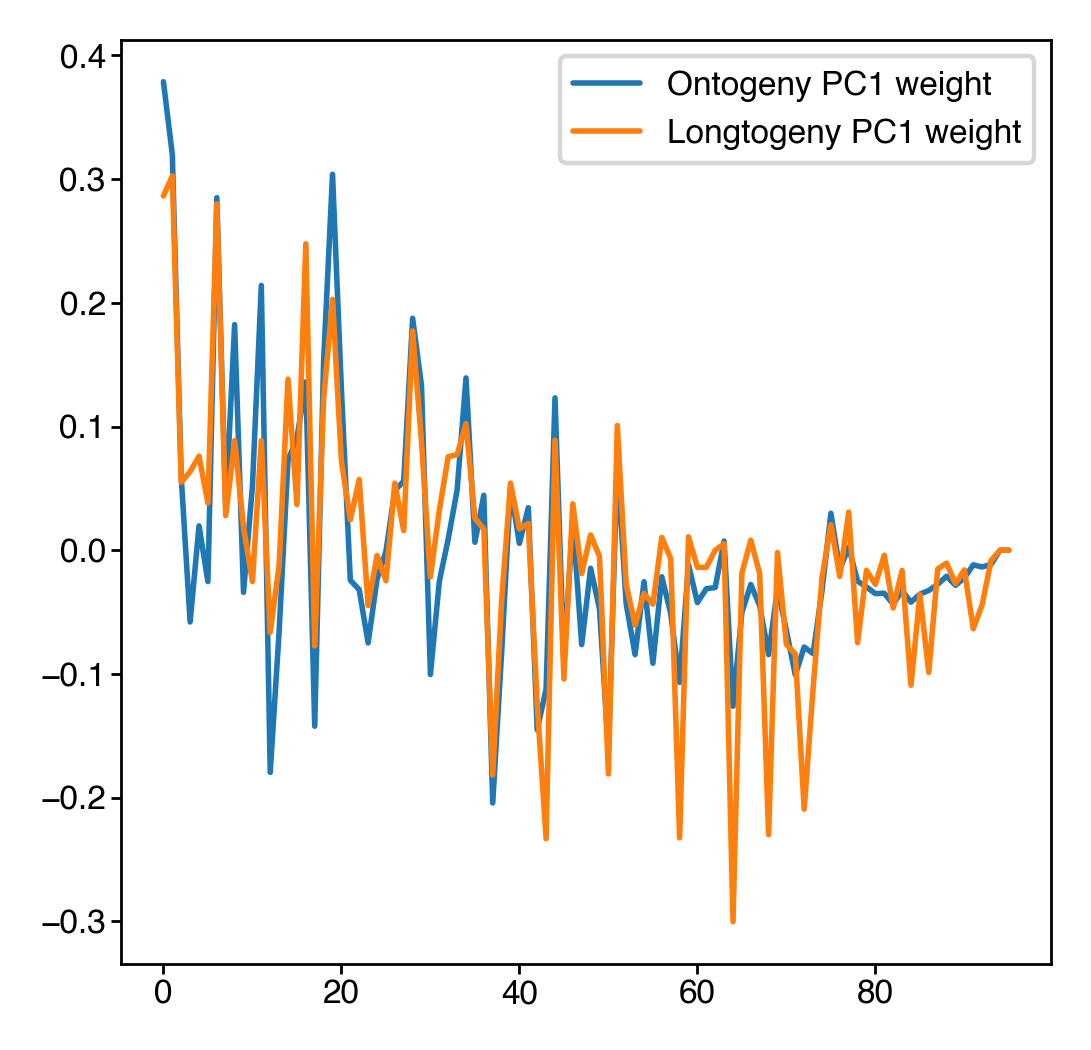

In [56]:
plt.plot(ont_components[0], label="Ontogeny PC1 weight")
plt.plot(-long_components[0], label="Longtogeny PC1 weight")
plt.legend()
np.corrcoef(ont_components[0], long_components[0])[0, 1]

<Axes: xlabel='Ontogeny PC1 weight', ylabel='Longtogeny PC1 weight'>

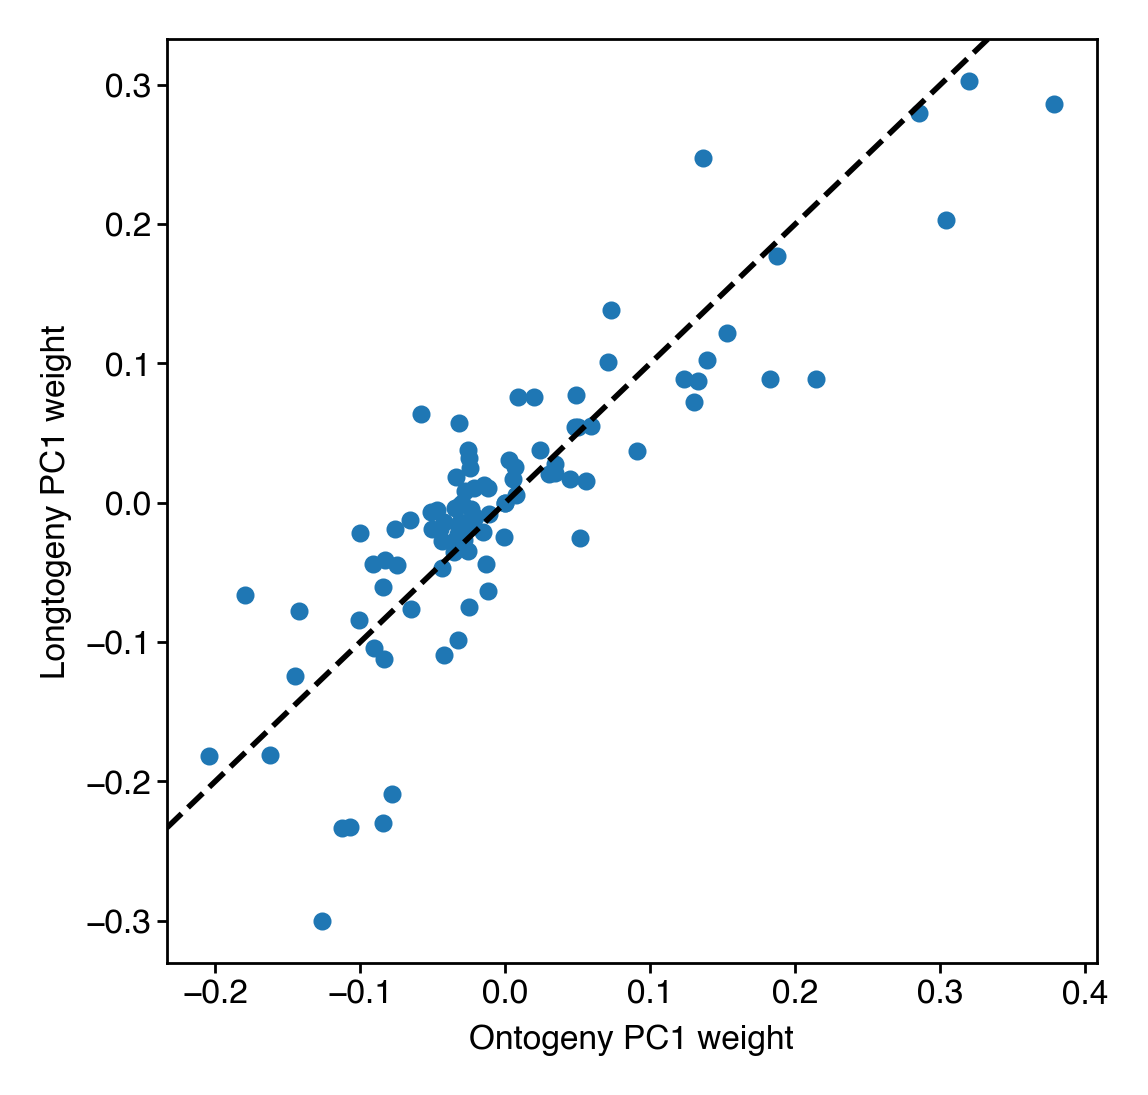

In [57]:
plt.scatter(ont_components[0], -long_components[0], s=6)
plt.xlabel("Ontogeny PC1 weight")
plt.ylabel("Longtogeny PC1 weight")
dotted_identity(plt.gca())